In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RAW_TRAIN_DATA_PATH = 'rag-dataset-12000/data/train-00000-of-00001-9df3a936e1f63191.parquet'
RAW_TEST_DATA_PATH = 'rag-dataset-12000/data/test-00000-of-00001-af2a9f454ad1b8a3.parquet'

In [20]:
train_file_path = 'rag-dataset-12000/data/train-00000-of-00001-9df3a936e1f63191.parquet'
df = pd.read_parquet(train_file_path)
df.head(2)

,context,question,answer
0,Caption: Tasmanian berry grower Nic Hansen sho...,What is the Berry Export Summary 2028 and what...,The Berry Export Summary 2028 is a dedicated e...
1,RWSN Collaborations\nSouthern Africa Self-supp...,What are some of the benefits reported from ha...,Benefits reported from having access to Self-s...


In [13]:
# Avgerage Context Length
context_lengths = df['context'].str.len()
print(f'Average Context Length: {context_lengths.mean()}')

# Max Context Length
context_lengths = df['context'].str.len()
print(f'Max Context Length: {context_lengths.max()}')

Average Context Length: 3438.21125
Max Context Length: 9156


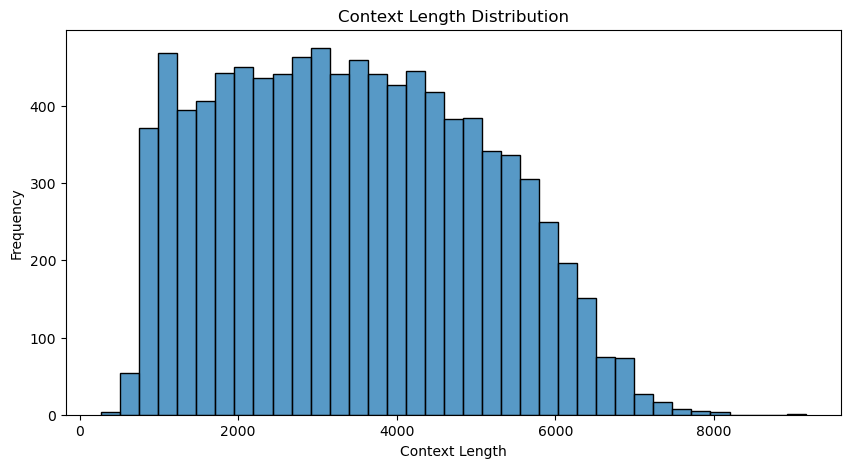

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(context_lengths, ax=ax)
ax.set_title('Context Length Distribution')
ax.set_xlabel('Context Length')
ax.set_ylabel('Frequency')
plt.show()

## Spot check 25 query and response pairs

In [17]:
np.random.seed(0)
df.loc[np.random.randint(0, len(df), size=25), ].to_excel('sample_data.xlsx', index=False)

In [21]:
df.to_csv('train_data.csv')